<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#General-Information" data-toc-modified-id="General-Information-1">General Information</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2">Data Preparation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Calls-per-user-per-month" data-toc-modified-id="Calls-per-user-per-month-2.0.0.1">Calls per user per month</a></span></li><li><span><a href="#Messages-per-user-per-month" data-toc-modified-id="Messages-per-user-per-month-2.0.0.2">Messages per user per month</a></span></li><li><span><a href="#Data-usage-per-user-per-month" data-toc-modified-id="Data-usage-per-user-per-month-2.0.0.3">Data usage per user per month</a></span></li><li><span><a href="#Total-services-per-user" data-toc-modified-id="Total-services-per-user-2.0.0.4">Total services per user</a></span></li><li><span><a href="#Monthly-profit-from-each-user" data-toc-modified-id="Monthly-profit-from-each-user-2.0.0.5">Monthly profit from each user</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-3">Data Analysis</a></span></li><li><span><a href="#Testing-Hypotheses" data-toc-modified-id="Testing-Hypotheses-4">Testing Hypotheses</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Testing-a-hypothesis:-the-average-profit-from-user-of-Ultimate-and-Surf-calling-plans-differs" data-toc-modified-id="Testing-a-hypothesis:-the-average-profit-from-user-of-Ultimate-and-Surf-calling-plans-differs-4.0.0.1">Testing a hypothesis: the average profit from user of Ultimate and Surf calling plans differs</a></span></li><li><span><a href="#Testing-a-hypothesis:-the-average-profit-from-user-in-NY-NJ-area-is-different-from-that-of-the-users-from-other-regions." data-toc-modified-id="Testing-a-hypothesis:-the-average-profit-from-user-in-NY-NJ-area-is-different-from-that-of-the-users-from-other-regions.-4.0.0.2">Testing a hypothesis: the average profit from user in NY-NJ area is different from that of the users from other regions.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Overall-Conclusion" data-toc-modified-id="Overall-Conclusion-5">Overall Conclusion</a></span></li></ul></div>

# General Information

<b>Project description</b><br>
    The Megaline company is a telecom operator. It offers its clients two prepared plans, Surf and Ultimate. The commercial department wants to know which of the plans is more profitable in order to adjust the advertising budget.<br>
<b>The task</b> is analyze client's behavior and determine which repaid plan is more profitable. To complete the task we need to carry out a preliminary analytics of the plans based on a relatively small client selection - data of 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and test messages they sent in 2018.<br>
<b>Description of the plans</b><br>
Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 MB this month, they will be charged for 2 GB. 
    

| Plan name | Monthly charge | Included | Extra | 
| :-| :- | :- |:- |
| Surf | \$20 | 500 minutes, 50 texts, 15 GB of data | 1 minute: 3¢, 1 text message: 3¢, 1 GB: \$10 |
| Ultimate | \$70 | 3000 minutes, 1000 texts, 30 GB of data | 1 minute: 1¢, 1 text message: 1¢, 1 GB: \$7 |

<b>Data for analysis</b>:<br>
The users table (data on users)<br>
The calls table (data on calls)<br>
The messages table (data on texts)<br> 
The internet table (data on web sessions)<br>
The plans table (data on the plans)<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
%matplotlib inline
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
df_users = pd.read_csv('megaline_users.csv')
df_calls = pd.read_csv('megaline_calls.csv')
df_messages = pd.read_csv('megaline_messages.csv')
df_internet = pd.read_csv('megaline_internet.csv')
df_plans = pd.read_csv('megaline_plans.csv')

In [3]:
def data_info(table):
    '''The function takes a data frame as an argument
    and displays data frame info and prints out first 5 rows'''
    display(table.info())
    display(table.head())

In [4]:
def duplicates(table):
    '''The function takes a data frame as a parameter 
    and prints a sum of duplicated records'''
    print(table.duplicated().sum())

In [5]:
def extra_usd(row, included, used, usd):
    '''The function takes deternimes if there is over the plan
    usage and calculates extra revenue if applicable'''
    if row[included] > row[used]:
        return 0
    return (row[used] - row[included]) * row[usd]

In [6]:
def slicer(full_address):
    '''The function searches for NY and NJ states
    and returns 1 if finds them or 0 is does not find them'''
    if 'NY' in full_address:
        return 1
    elif 'NJ' in full_address:
        return 1
    else:
        return 0

Let's take a look at each individual table.

##### Users table

In [7]:
data_info(df_users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


<b>The users table</b> (data on users):<br>
    <i>user_id</i> — unique user identifier<br>
    <i>first_name</i> — user's name<br>
    <i>last_name</i> — user's last name<br>
    <i>age</i> — user's age (years)<br>
    <i>reg_date</i> — subscription date (dd, mm, yy) <br>
    <i>churn_date</i> — the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was generated)<br>
    <i>city</i> — user's city of residence<br>
    <i>plan</i> — calling plan name<br>

466 rows are missing in the Churn Date column, which tells us that these users still use Megaline services. 34 Users on contrary have quit this telecom operator.

##### Calls table

In [8]:
data_info(df_calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


<b>The calls table</b> (data on calls):<br> 
    <i>id</i> — unique call identifier<br> 
    <i>call_date</i> — call date<br> 
    <i>duration</i> — call duration (in minutes)<br> 
    <i>user_id</i> — the identifier of the user making the call<br> 

##### Messages table

In [9]:
data_info(df_messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


<b>The messages table</b> (data on messages):<br>
    <i>id</i> — unique text message identifier<br>
    <i>message_date</i> — text message date<br>
    <i>user_id</i> — the identifier of the user sending the text<br>

##### Internet table

In [10]:
data_info(df_internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


<b>The internet table</b> (data on web sessions):<br>
    <i>_id</i> — unique session identifier<br>
    <i>mb_used</i> — the volume of data spent during the session (in megabytes)<br> 
    <i>session_date</i> — web session date<br>
    <i>user_id</i> — user identifier<br>

##### Plans table

In [11]:
data_info(df_plans)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<b>The plans table</b> (data on the plans):<br>
    <i>plan_name</i> — calling plan name<br>
    <i>usd_monthly_fee</i> — monthly charge in US dollars<br>
    <i>minutes_included</i> — monthly minute allowance<br> 
    <i>messages_included</i> — monthly text allowance<br> 
    <i>mb_per_month_included</i> — data volume allowance (in megabytes)<br>

# Data Preparation

Let's find out if there are duplicates.

In [12]:
datasets = [df_users, df_calls, df_messages, df_internet, df_plans]
for df, name in zip(datasets, ['users', 'calls', 'messages', 'internet', 'plans']):
    print(f"Number of duplicated records in {name} is {df.duplicated().sum()}")

Number of duplicated records in users is 0
Number of duplicated records in calls is 0
Number of duplicated records in messages is 0
Number of duplicated records in internet is 0
Number of duplicated records in plans is 0


We discovered before that the only column in all datasets with missing values is "churn_date", Users table, which is the date the user stopped using service, if the value is missing, the user was still using the plan at time when the data was generated. We are going to replace missing values with the today's date.

In [13]:
# Taking a timestamp for today to replace with it NaN's in the "churn_date" column.                                                                      
today = pd.Timestamp("today").strftime("%Y-%m-%d")
# Replacing NaN's with today's date.
df_users['churn_date'] = df_users['churn_date'].fillna(today)

Let's convert all dates in all datasets to date type.

In [14]:
# Change data type to the date format.
df_calls['call_date'] = pd.to_datetime(
    df_calls['call_date'], format='%Y-%m-%dT%H:%M:%S')
df_internet['session_date'] = pd.to_datetime(
    df_internet['session_date'], format='%Y-%m-%dT%H:%M:%S')
df_messages['message_date'] = pd.to_datetime(
    df_messages['message_date'], format='%Y-%m-%dT%H:%M:%S')
df_users['reg_date'] = pd.to_datetime(
    df_users['reg_date'], format='%Y-%m-%dT%H:%M:%S')
df_users['churn_date'] = pd.to_datetime(
    df_users['churn_date'], format='%Y-%m-%dT%H:%M:%S')

As per the plan rule each individual call is rounded up to a full minute. So let's round up a duration of a call to the a full minute.

In [15]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil).apply(int)

The plan description it says: "For web traffic individual sessions are not rounded up. Instead, the total for the month is rounded up. The Surf plan includes 15 GB and the Ultimate plan includes 30 GB". Thus, the table with tariff description should be changed to include GBs included, not MBs.

In [16]:
df_plans['gb_per_month_included'] = (
    df_plans['mb_per_month_included']/1024).apply(int)

#### Calls per user per month

Let's determine number of calls made and minutes used per month.

In [17]:
# Extracting a month from the "call_date" and creating a new column
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
# Finding minutes used and number of calls made per month
calls_month = df_calls.groupby(['user_id', 'month']).duration.agg(['sum', 'count'])
# Renaming columns.
calls_month.columns = ['minutes_used', 'number_of_calls']

In [18]:
calls_month

minutes_used  number_of_calls
user_id month                               
1000    12              124               16
1001    8               182               27
        9               315               49
        10              393               65
        11              426               64
...                     ...              ...
1498    12              339               39
1499    9               346               41
        10              385               53
        11              308               45
        12              496               65

[2258 rows x 2 columns]

#### Messages per user per month

Let's determine number of messages sent per month.

In [19]:
# Extracting a month from the "message_date" column.
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
# Finding number of messages used per user per month
messages_month = df_messages.groupby(['user_id', 'month']).message_date.agg(['count'])
# Renaming a column.
messages_month.columns = ['messages_per_month']

In [20]:
messages_month

messages_per_month
user_id month                    
1000    12                     11
1001    8                      30
        9                      44
        10                     53
        11                     36
...                           ...
1496    9                      21
        10                     18
        11                     13
        12                     11
1497    12                     50

[1806 rows x 1 columns]

#### Data usage per user per month

Let's determine data used per month.

In [21]:
# Extracting a month from the "session_date" column into a new column
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
# Creating a pivot table to calculate volume (in megabytes) of data used per month
data_month = df_internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc='sum')
# Renaming a column
data_month.columns = ['data_per_month']

In [22]:
# Rounding up MB used per month as per plans' rules
data_month['data_per_month'] = (data_month['data_per_month']/1024).apply(np.ceil).apply(int)

In [23]:
data_month

data_per_month
user_id month                
1000    12                  2
1001    8                   7
        9                  14
        10                 22
        11                 19
...                       ...
1498    12                 23
1499    9                  13
        10                 20
        11                 17
        12                 22

[2277 rows x 1 columns]

#### Total services per user

Merging all three tables that we created earlier into one table. This table will have summary of how many minutes, calls, messages and data a user used each month.

In [24]:
usage_per_user = pd.concat([calls_month, messages_month, data_month], axis=1).reset_index(
).fillna(0).merge(df_users, how='outer').fillna(0)

#### Monthly profit from each user

In [25]:
# Renaming a column header to use is as a key to merge tables
df_plans = df_plans.rename(columns= {'plan_name': 'plan'})

Merging data from 'df_plans' table with total monthly 'usage_per_user' table.

In [26]:
df = usage_per_user.merge(df_plans, on='plan')

We will create some new columns with the information about how much a user spends over his/her prepaid plan. To do so,  we will apply a function that returns 0 if a user doesn't use minutes, messages or data over his/her plan and returns usd spent if otherwise.

In [27]:
df['voice_revenue'] = df.apply(extra_usd, args=(
    'minutes_included', 'minutes_used', 'usd_per_minute'), axis=1)
df['text_revenue'] = df.apply(extra_usd, args=(
    'messages_included', 'messages_per_month', 'usd_per_message'), axis=1)
df['data_revenue'] = df.apply(extra_usd, args=(
    'gb_per_month_included', 'data_per_month', 'usd_per_gb'), axis=1)

Creating a new column with the total revenue from each user per month.

In [28]:
df['monthly_profit'] = df['usd_monthly_pay'] + \
    df['voice_revenue'] + df['text_revenue'] + df['data_revenue']

In [29]:
df

,user_id,month,minutes_used,number_of_calls,messages_per_month,data_per_month,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,voice_revenue,text_revenue,data_revenue,monthly_profit
0,1000,12.0,124.0,16.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2021-01-02,1000,30720,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0
1,1006,11.0,10.0,2.0,15.0,3.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0
2,1006,12.0,59.0,9.0,139.0,32.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,30,0.0,0.0,14.0,84.0
3,1008,10.0,476.0,71.0,21.0,17.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2021-01-02,1000,30720,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0
4,1008,11.0,446.0,63.0,37.0,24.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2021-01-02,1000,30720,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,0.0,0.0,0.0,0.0,0.0,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,2021-01-02,50,15360,500,20,10,0.03,0.03,15,0.0,0.0,0.0,20.0
2299,1307,0.0,0.0,0.0,0.0,0.0,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,2021-01-02,50,15360,500,20,10,0.03,0.03,15,0.0,0.0,0.0,20.0
2300,1319,0.0,0.0,0.0,0.0,0.0,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,2021-01-02,50,15360,500,20,10,0.03,0.03,15,0.0,0.0,0.0,20.0
2301,1378,0.0,0.0,0.0,0.0,0.0,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,2021-01-02,50,15360,500,20,10,0.03,0.03,15,0.0,0.0,0.0,20.0


The table 'df' has 2303 rows and 25 columns and combined all the data from the provided datasets in it.

# Data Analysis

To describe customer behavior of the users of both plans we will apply describe method, that will tell us statistical data for selected rows. 

In [30]:
usage_per_user.query('plan == "surf"')[
    ['minutes_used', 'number_of_calls', 'messages_per_month', 'data_per_month']].describe()

,minutes_used,number_of_calls,messages_per_month,data_per_month
count,1579.000000,1579.000000,1579.000000,1579.000000
mean,427.120329,59.584547,31.041165,16.607346
std,235.490079,32.168377,33.557683,7.899502
min,0.000000,0.000000,0.000000,0.000000
25%,269.000000,39.000000,3.000000,12.000000
50%,424.000000,60.000000,24.000000,17.000000
75%,576.000000,79.000000,47.000000,21.000000
max,1510.000000,205.000000,266.000000,70.000000


In [31]:
usage_per_user.query('plan == "ultimate"')[
    ['minutes_used', 'number_of_calls', 'messages_per_month', 'data_per_month']].describe()

,minutes_used,number_of_calls,messages_per_month,data_per_month
count,724.000000,724.000000,724.000000,724.000000
mean,428.071823,60.291436,37.343923,17.211326
std,241.958423,33.454527,34.782576,7.755841
min,0.000000,0.000000,0.000000,0.000000
25%,258.750000,36.000000,6.000000,13.000000
50%,421.500000,61.000000,30.000000,17.000000
75%,564.250000,79.250000,60.250000,21.000000
max,1369.000000,191.000000,166.000000,46.000000


Let's calculate variance too.

In [32]:
np.round(usage_per_user.pivot_table(index='plan',
                                    values=('minutes_used', 'number_of_calls',
                                            'messages_per_month', 'data_per_month'),
                                    aggfunc='var'), 2)

,data_per_month,messages_per_month,minutes_used,number_of_calls
plan,,,,
surf,62.40,1126.12,55455.58,1034.80
ultimate,60.15,1209.83,58543.88,1119.21


Let's remind ourselves the two plans rules. The Surf plan includes: 500 minutes, 50 texts, 15 GB of data and the Ultimate plan includes: 3000 minutes, 1000 texts, 30 GB of data.<br>
It is convenient to look at the numbers for both plans together. We can observe that:<br>
- The average minutes used by users of both plans is almost the same: 427 mins for Surf users and 428 mins for Ultimate users. For both plans the mean values are below the lowest limit of the Surf plan (500 mins).
- The average number of text messages sent monthly is 31 for the Surf and 37 for the Ultimate. Again, the mean numbers for both plans are withing the lowest limit of the Surf plan (50 text).
- Lastly, the average data used monthly is 16.6 GB for the Surf and 17.2 for the Ultimate. On average users of the Surf plan exceed the monthly limit of 15 GB. The users of the Ultimate plan on average use about 60% of the monthly data allowance. <br>

Let's take another step and take a look a the boxplot graphs for the service consumption by a plan.

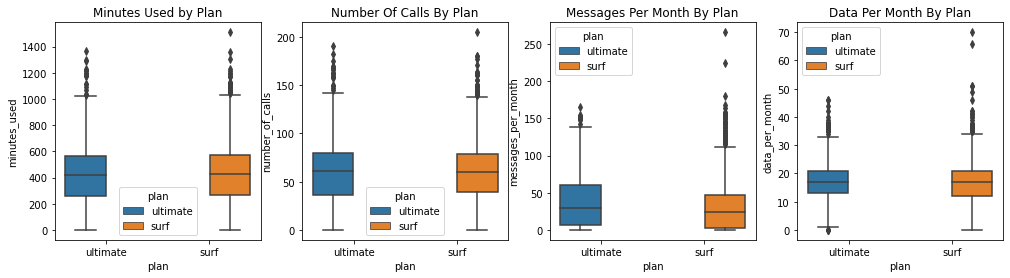

In [33]:
fig, axes = plt.subplots(1, 4, figsize=(17, 4))

sns.boxplot(x='plan', y='minutes_used',
            data=usage_per_user, hue='plan', ax=axes[0])
axes[0].set_title("Minutes Used by Plan")
sns.boxplot(x='plan', y='number_of_calls',
            data=usage_per_user, hue='plan', ax=axes[1])
axes[1].set_title("Number Of Calls By Plan")
sns.boxplot(x='plan', y='messages_per_month',
            data=usage_per_user, hue='plan', ax=axes[2])
axes[2].set_title("Messages Per Month By Plan")
sns.boxplot(x='plan', y='data_per_month',
            data=usage_per_user, hue='plan', ax=axes[3])
axes[3].set_title("Data Per Month By Plan")
plt.show()

From the boxplots we can see that the "Surf" plan usage has more outliers than the "Ultimate" plan. Now we are going to plot pairplot graphs for the observed parameters. Plus, sine we saw that "Surf" users tend to text more, let's add 'age' column to see if there is any correlation between user's age and plan.

<Figure size 864x576 with 0 Axes>

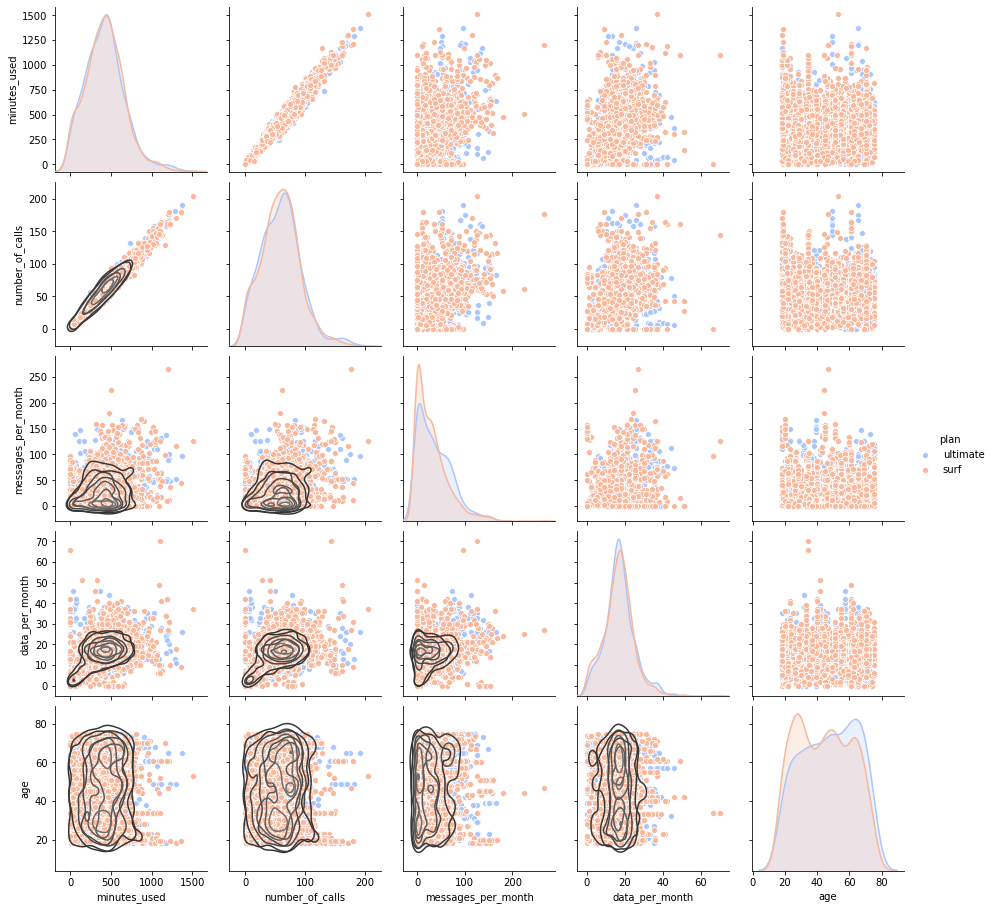

In [34]:
plt.figure(figsize=(12, 8))
g = sns.pairplot(df,  hue='plan',
                 vars=['minutes_used', 'number_of_calls',
                       'messages_per_month', 'data_per_month', 'age'],
                 palette='coolwarm')
g.map_lower(sns.kdeplot, levels=4, color=".5")
plt.show()

Again, we see similar picture: the shapes of the distribution graphs look to be the same, with the exception of amount of messages per moth: "Surf" users tend to text more. It also looks like there are relatively more people in their twenties who use the "Surf" plan and more people in their sixties who use the "Ultimate" plan.

The main take away from our observations is that regardless of the plan mobile phone users tend to use just as much minutes, messages and data as they need. For example, the Ultimate users consume minutes and data well below their monthly allowance. They will not use more just because they can.

# Testing Hypotheses

#### Testing a hypothesis: the average profit from user of Ultimate and Surf calling plans differs

Let's formulate the null and the alternative hypotheses.<br>
Ho : m1 = m2 (the average profit from users of Ultimate and Surf calling plans does not differ)<br>
Ha : m1 <> m2 (the average profit from users of Ultimate and Surf calling plans differs)

We will set the significance level to 5%, because we believe it will be appropriate for this subject of analysis.

In [35]:
# Setting the statistical significance level:
alpha = .05

Let's find variances as well to see which parameter to use in the test.

In [36]:
df.query('plan == "surf"').monthly_profit.var()

3062.4468636121806

In [37]:
df.query('plan == "ultimate"').monthly_profit.var()

129.15955617706817

We can see that the variances of two populations are quite different, so we will set the "equal variance" parameter to False.

In [38]:
result1 = st.ttest_ind(df.query('plan == "surf"').monthly_profit,
                       df.query('plan == "ultimate"').monthly_profit,
                       equal_var=False)

In [39]:
result1

Ttest_indResult(statistic=-8.073538160306446, pvalue=1.2184115852123163e-15)

In [40]:
# Comparing p-value to the statistical significance:
result1.pvalue < alpha


True

The data provides sufficient evidence, given the the significance level we selected, to reject the null hypothesis. Therefore we can conclude that the average profit from users of Ultimate and Surf plan differs.

#### Testing a hypothesis: the average profit from user in NY-NJ area is different from that of the users from other regions.

Let's formulate the null and the alternative hypotheses.<br>
Ho : m1 = m2 (the average profit from users in NY-NJ area is the same from that of the users from other regions)<br>
Ha : m1 <> m2 (the average profit from users in NY-NJ area is different from that of the users form other regions)

Let's create a column State, which value will be equal to 1 if the address of an user if NY or NJ states, and to 0 if otherwise.

In [41]:
# Applying function that 'sorts' states
df['state'] = df['city'].apply(slicer)

We will set the significance level to 5%, because we believe it will be appropriate for this subject of analysis.

In [42]:
# Setting the statistical significance level:
alpha2 = .05

Let's find variances as well to see which parameter to use in the test.

In [43]:
df.query('state == 1').monthly_profit.var()

2106.0272082805286

In [44]:
df.query('state == 0').monthly_profit.var()

2185.1078165824147

Based on the variances results we will assume equal variances condition.

In [45]:
result2 = st.ttest_ind(df.query('state == 1').monthly_profit, 
                      df.query('state == 0').monthly_profit, 
                      equal_var=True)

In [46]:
result2

Ttest_indResult(statistic=-1.5348238935179888, pvalue=0.12496457182859122)

In [47]:
# Comparing p-value to the statistical significance:
result2.pvalue < alpha2


False

We cannot reject the null hypothesis. There is a 20% probability of randomly getting the same average amount spent. This probability is clearly too high to conclude that there is a significant difference between the average amounts spent.

# Overall Conclusion

<b>General Information</b><br>
Our data contains five datasets. Only one column of one table has missing values. Some data types (for example dates) are in incorrect format. 

<b>Data Preparation</b><br>
No duplicates were found in the data. Only one column of one table had missing values, which was logically correct. We replaced missing data with today's time stamp. We converted all dates to correct format. Minutes used and data used per month were rounded according to the plans' rules.<br>
Data was arranged and combined in one table, this table was used for further analysis.

<b>Data Analysis</b><br>
The analysis of customer behavior showed no significant variance in the amount of minutes used, text messages sent or data used monthly by a user's plan. The means and variances for the amount of services used appeared to be relatively the same.<br>

<b>Testing Hypotheses</b><br>
Two hypotheses were tested in regards to the profit from users of the two plans.
1. The first hypothesis was that the average profit from users of Ultimate and Surf calling plans differs. The significance level to test this hypothesis was chosen to be 1%. The results of the computation provided the evidence that the null hypothesis, stating that the profit is the same, could be rejected and we can accept the alternative hypothesis.
2. The second hypothesis stated that the average profit from users in NY-NJ area is different from that of users from other states. We set the significance level as 5%. Given the selected significance level we could not reject the hull hypothesis. Thus, we can conclude that there is no difference in profits level from users in NY-NJ area from that of the users of other regions.